# 03 - Calcul d'anomalies

## 1. Vérification du biais résiduel

Vérifions, désormais, si les données préparées sont prêtes pour un apprentissage par la machine. Une première méthode pour détecter des anomalies consiste à calculer le biais résiduel global, une mesure qui reflète le degrée de "centralité" du jeu de donnée. Pour chaque point, on le calcule de la manière suivante : 

$$
\quad b(x, y, t) = T(x, y, t) - \bar{T}(x, y)
$$

Avec $ \bar{T}(x, y) $, la moyenne des SST en fonction du temps donnée par : $ \bar{T}(x, y) = \frac{1}{N} \sum_{i=1}^N T_i $. On obtient le biais résiduel en faisant la moyenne de l'ensemble des biais résiduels déterminés en fonction des 3 dimensions, soit :

$$
B = \frac{1}{N_x N_y N_t} \sum_{x=1}^{N_x} \sum_{y=1}^{N_y} \sum_{t=1}^{N_t} \big( T(x, y, t) - \bar{T}(x, y) \big)
$$

In [9]:
import xarray as xr

# Load the processed SST dataset

ds = xr.open_dataset("data/processed/sstCOPERNICUS20102019Processed.nc")

sst = ds['analysed_sst']

sstMean = sst.mean(dim='time')

sstAnom = sst - sstMean

residualMean = sstAnom.mean(dim=['time', 'latitude', 'longitude'])
print("Biais résiduel global :", residualMean.values)

Biais résiduel global : 4.0756737e-07


On obtient une valeur proche de l'ordre du millionième (~4*10^-7). C'est exactement ce que l'on souhaite obtenir car on souhaite que le biais résiduel global tende vers 0 (idéal de centralité du jeu de donnée). On souhaite tendre vers cet idéal, car cela signifie que les anomalies sont bien centrées autour de 0, et que par conséquence, aucun décalage systématique ne subsiste dans les données. Dans le cas contraire, le modèle que nous allons entraîné pourrait apprendre un décalage inutile, perturbant ainsi la convergence et les prédictions.
En clair, aucun centrage des données n'est nécessaire.

## 2. Quantifier la variabilité dynamique

La variabilité permet de voir où se passent les signaux forts, et de savoir quelles parties de la donnée sont significatives pour l’apprentissage. On parle de variabilité "dynamique", d'une part, car elle évolue dans le temps et l'espace (dû aux 3 dimensions latitude, longitude et temps), et d'autre part, car cette fluctuation de la SST autour de la moyenne locale capture la réponse du système océan-atmosphère aux variations locales et temporelles dûes à des facteurs exogènes (marées, vents, courants côtiers, etc.).
L'outil mathématique de base pour quantifier cette variabilité est l'écart-type en fonction du temps, on le détermine ponctuellement à l'aide de la formule suivante :

$$
\sigma(x, y) = \sqrt{ \frac{1}{N_t} \sum_{t=1}^{N_t} \big( b(x, y, t) \big)^2 } 
$$

La variabilité dynamique globale se base sur la même formule mais en fonction des 3 dimensions disponibles pour notre jeu de donnée. Ce qui nous donne la formule suivante :

$$
\sigma_{\text{globale}} = \sqrt{ \frac{1}{N_x N_y N_t} \sum_{x=1}^{N_x} \sum_{y=1}^{N_y} \sum_{t=1}^{N_t} \big( b(x, y, t) \big)^2 }
$$

/nix/store/7vahi71aq8aphys5h9xyyfif557q92xa-python3-3.12.12-env/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Variabilité dynamique globale : 3.2895494


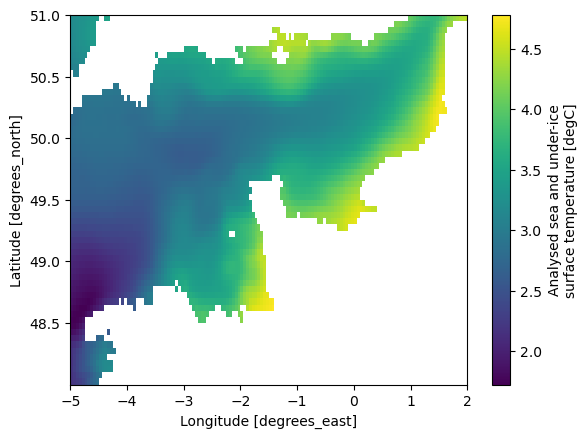

In [12]:
# Standard deviation over time for each grid point

sstStd = sstAnom.std(dim='time')
sstStd.plot() # Plotting it to visualize spatial variability

# Global standard deviation (or global dynamic variability)

globalStd = sstAnom.std(dim=['time', 'latitude', 'longitude'])
print("Variabilité dynamique globale :", globalStd.values)